# Assignment group 2: Network and exploratory data analysis

## Module C _(40 pts)_ Exploring a network of ingredients
In This section we're going to experiment with some recipes data, but think of them as a network. These data can be obtained from Kaggle:

- https://www.kaggle.com/kaggle/recipe-ingredients-dataset

and are packaged with the assignment in the following directory:

- `./data/train.json`

__C1.__ _(2 pts)_ To start, load the recipe data from `json` format and print the first 5 recipes.

In [3]:
## import json
import json
json_data = open('./data/train.json')
data = json.load(json_data)
#print first 5 recipes
recipe_data = data[0:5]
print(recipe_data)

[{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}, {'id': 25693, 'cuisine': 'southern_us', 'ingredients': ['plain flour', 'ground pepper', 'salt', 'tomatoes', 'ground black pepper', 'thyme', 'eggs', 'green tomatoes', 'yellow corn meal', 'milk', 'vegetable oil']}, {'id': 20130, 'cuisine': 'filipino', 'ingredients': ['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers']}, {'id': 22213, 'cuisine': 'indian', 'ingredients': ['water', 'vegetable oil', 'wheat', 'salt']}, {'id': 13162, 'cuisine': 'indian', 'ingredients': ['black pepper', 'shallots', 'cornflour', 'cayenne pepper', 'onions', 'garlic paste', 'milk', 'butter', 'salt', 'lemon juice', 'water', 'chili powder', 'passata', 'oil', 'ground cumin', 'boneless chicken skinless thig

__C2.__ _(5 pts)_ Build an _undirected_ network representation of the ingredients data using the NetworkX module using the `.Graph()` graph type. In particular, for this network each ingredient will represent a node, and when two ingredients appear in the same recipe there should be a link drawn between them.

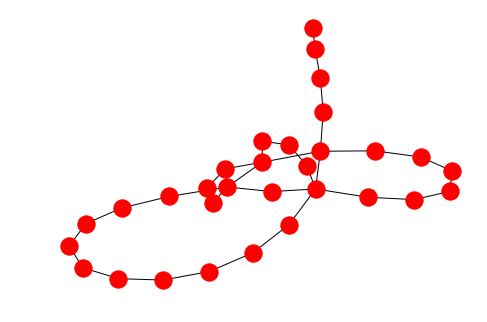

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import collections 

G=nx.Graph()
recipe_data1 = ['romaine lettuce','black olives','grape tomatoes','garlic','pepper','purple onion','seasoning','garbanzo beans',
'feta cheese crumbles','plain flour','ground pepper','salt','tomatoes','ground black pepper','thyme','eggs','green tomatoes',
'yellow corn meal','milk','vegetable oil',
'eggs','pepper','salt','mayonaise','cooking oil','green chilies','grilled chicken breasts','garlic powder','yellow onion','soy sauce','butter','chicken livers',
'water','vegetable oil','wheat','salt']

#Removing duplicates
## add ingredients data as node
G.add_nodes_from(recipe_data1)
#draw path between two ingredients
G =nx.path_graph(recipe_data1)
#draw the pic
nx.draw(G)


__C3.__ _(8 pts)_ Utilize NetworkX and the ingredients network and find the node degrees, i.e., numbers of connections to other ingredients across the recipes. Use this to compute the network's average and median degrees, and to print the top $5$ ingredients by degree. Discuss this output and how it helps you to understand if you've constructed the network correctly.

_Response._ 

In [69]:
## code here
import statistics 
G = nx.path_graph(recipe_data1) 
#node degree
degrees = G.degree()
valuedegree = [val for (node,val) in G.degree()]
def number_of_nodes(G):
    return G.number_of_nodes()
number = G.number_of_nodes()
sum_of_degree = sum(valuedegree)
#mean degree
mean_degree = sum_of_degree/number
#median degree
median_degree = statistics.median(valuedegree)
sorted(G.degree, key=lambda x: x[1], reverse=True)
print(degrees)
print(mean_degree)
print(median_degree)

[('romaine lettuce', 1), ('black olives', 2), ('grape tomatoes', 2), ('garlic', 2), ('pepper', 4), ('purple onion', 2), ('seasoning', 2), ('garbanzo beans', 2), ('feta cheese crumbles', 2), ('plain flour', 2), ('ground pepper', 2), ('salt', 5), ('tomatoes', 2), ('ground black pepper', 2), ('thyme', 2), ('eggs', 4), ('green tomatoes', 2), ('yellow corn meal', 2), ('milk', 2), ('vegetable oil', 4), ('mayonaise', 2), ('cooking oil', 2), ('green chilies', 2), ('grilled chicken breasts', 2), ('garlic powder', 2), ('yellow onion', 2), ('soy sauce', 2), ('butter', 2), ('chicken livers', 2), ('water', 2), ('wheat', 2)]
2.2580645161290325
2


Q1:According to the sorted commend, the TOP FIVE ingredients are:
sallt, pepper, eggs, vegetable oil, black olives
Q2:it helps we understand the constructed network works because it is similar to the raw dataset and also based on our common sense
QC4:they are higher than median and average degree

__C4.__ _(7 pts)_ Now, for each degree $k$ your job is to count up the number of nodes $n_k$ that have degree $k$. Store the unique values of $k$ in a list called `degree_numbers` and the corresponding values $n_k$ in a list called `degree_counts`. Sort these two lists in order of decreasing $k$ and print the five most common degree numbers.

Comment on the top five most common degree numbers (the mode) and any difference in these values from the average and median degrees, reported in __C3__ in the response box below. Do you believe these data are skewed?

\[Hint: `from collections import Counter` for an object type that will make the counting and sorting processes very easy when starting from a list of `degrees`.\] 

_Response._

In [159]:
## code here
import collections
from collections import Counter
from math import pi
#sorting degreelist for further counting usage
degreelist=sorted(G.degree, key=lambda x: x[1], reverse=True)
#count degree numbers of each node
degree_numbers = Counter(elem[1] for elem in degreelist)
#get cooresponding name from tuple
degree_counts = {item[1] for item in degreelist} 
print(degree_numbers)
print(degree_counts)
print(degreelist)

Counter({2: 26, 4: 3, 5: 1, 1: 1})
{1, 2, 4, 5}
[('salt', 5), ('pepper', 4), ('eggs', 4), ('vegetable oil', 4), ('black olives', 2), ('grape tomatoes', 2), ('garlic', 2), ('purple onion', 2), ('seasoning', 2), ('garbanzo beans', 2), ('feta cheese crumbles', 2), ('plain flour', 2), ('ground pepper', 2), ('tomatoes', 2), ('ground black pepper', 2), ('thyme', 2), ('green tomatoes', 2), ('yellow corn meal', 2), ('milk', 2), ('mayonaise', 2), ('cooking oil', 2), ('green chilies', 2), ('grilled chicken breasts', 2), ('garlic powder', 2), ('yellow onion', 2), ('soy sauce', 2), ('butter', 2), ('chicken livers', 2), ('water', 2), ('wheat', 2), ('romaine lettuce', 1)]


__C5.__ _(5 pts)_ Your next job is to visualize the `degree_numbers` and `degree_counts` data. In particular, create a scatter plot of the _logarithms_ of these values, using the numpy utility `np.log10()` on each. 

When you've generated the visualization, complete with labels for both axes, describe any visual trends that you see in the markdown box below. Do the two (transformed) quantities appear to exhibit a relationship?

_Response._ 

Text(0,0.5,'degree_counts')

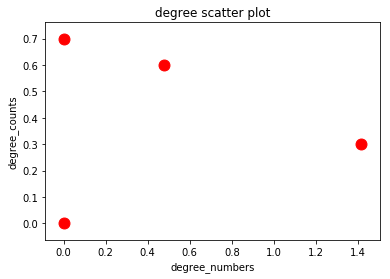

In [173]:
## code here
import numpy as np 
import matplotlib.pyplot as plt 
degree_numbers1=[1,26,3,1]
degree_counts1=[1,2,4,5]
ldgrnum = np.log10(degree_numbers1)
ldgrcon = np.log10(degree_counts1)
plt.scatter(x = ldgrnum, y = ldgrcon,s=120,c='red')
plt.title('degree scatter plot')
plt.xlabel('degree_numbers')
plt.ylabel('degree_counts')

No trends has been found,neither does quantitative relationship

__C6.__ _(3 pts)_ For a give node $u$ in our network $G$, let $\Gamma(u)$ denote the set of $u$'s neighbors, i.e., set of nodes linked to $u$.

In this part of the assignment we'll be utilizing the Jaccard coefficient (__Chapter 3.1.5.2__) similarity function on neighborhoods of nodes to determine the foods most likely to link to one anothers, i.e., appear in a recipe together heretofore unseen.

In particular, the Jaccard coefficient of nodes $u$ and $v$ is defined as

$$\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$$

where $\Gamma(u)$ denotes the set of neighbors of $u$ and can be computed through networkx utilizing the `nx.jaccard_coefficient(G, ebunch=None)` utility.

To begin, apply the `nx.jaccard_coefficient()` function to a few seemingly dispirate and a few seemingly similar ingredients (to your sensibilities). Once this is done, remark on the function of the measure in the response box below. Does this measure work as expected?

_Response._ 

In [232]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))
list1 = ['romaine lettuce','black olives','grape tomatoes','garlic','pepper','purple onion','seasoning','garbanzo beans',
'feta cheese crumbles','plain flour','ground pepper','salt']
list2 = ['ground pepper','salt','tomatoes','ground black pepper','thyme','eggs','green tomatoes',
'yellow corn meal','milk','vegetable oil']
jaccard_similarity(list1, list2)
#it measures work as expected 

0.1

__C7.__ _(5 pts)_ Next, create a list of node `names` using the `G.nodes()` method and corresponding adjacency matrtix from `nx.to_numpy_matrx()`. With these, create a function called `unlinked(v)` that returns a list of the names of all other nodes (ingredients) for which the node (queried ingredient) $v$ shares no link. 

Compare the size of outputs from this function when the two nodes `'salt'` and `'chocolate'` are queried, and comment in the response box below. Does the output make sense?

_Response._ 

In [273]:
## code here
#original name list
recipe_data1 = ['romaine lettuce','black olives','grape tomatoes','garlic','pepper','purple onion','seasoning','garbanzo beans',
'feta cheese crumbles','plain flour','ground pepper','salt','tomatoes','ground black pepper','thyme','eggs','green tomatoes',
'yellow corn meal','milk','vegetable oil',
'eggs','pepper','salt','mayonaise','cooking oil','green chilies','grilled chicken breasts','garlic powder','yellow onion','soy sauce','butter','chicken livers',
'water','vegetable oil','wheat','salt']
#remove duplicates
def Remove(recipe_data1): 
    final_list = [] 
    for num in recipe_data1: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 
#final name list
namelist= Remove(recipe_data1)
#creating corresponding adjacency matrtix
nx.to_numpy_matrix(G, nodelist= namelist)

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],

__C8.__ _(5 pts)_ Finally, write a function called `likely_ingredients(v)` that computes the Jaccard coefficients for all nodes returned by our previous functiton, i.e., from calling `unlinked(v)`. Return the these ingredient pairs and coefficients sorted by the coefficient values and print the top $5$ hits for a few different examples. 

Finally, in the response box below address the following question

> Do you think this analysis provides information more usefule for determining substitutions, for constructing new recipes pairings? Do you htink this could support either or both interests, and if so, how?

_Response._  

In [ ]:
## code here